# **Intelligent Transportation System: Optimal Routing and a Novel OBD Data-Logging System**

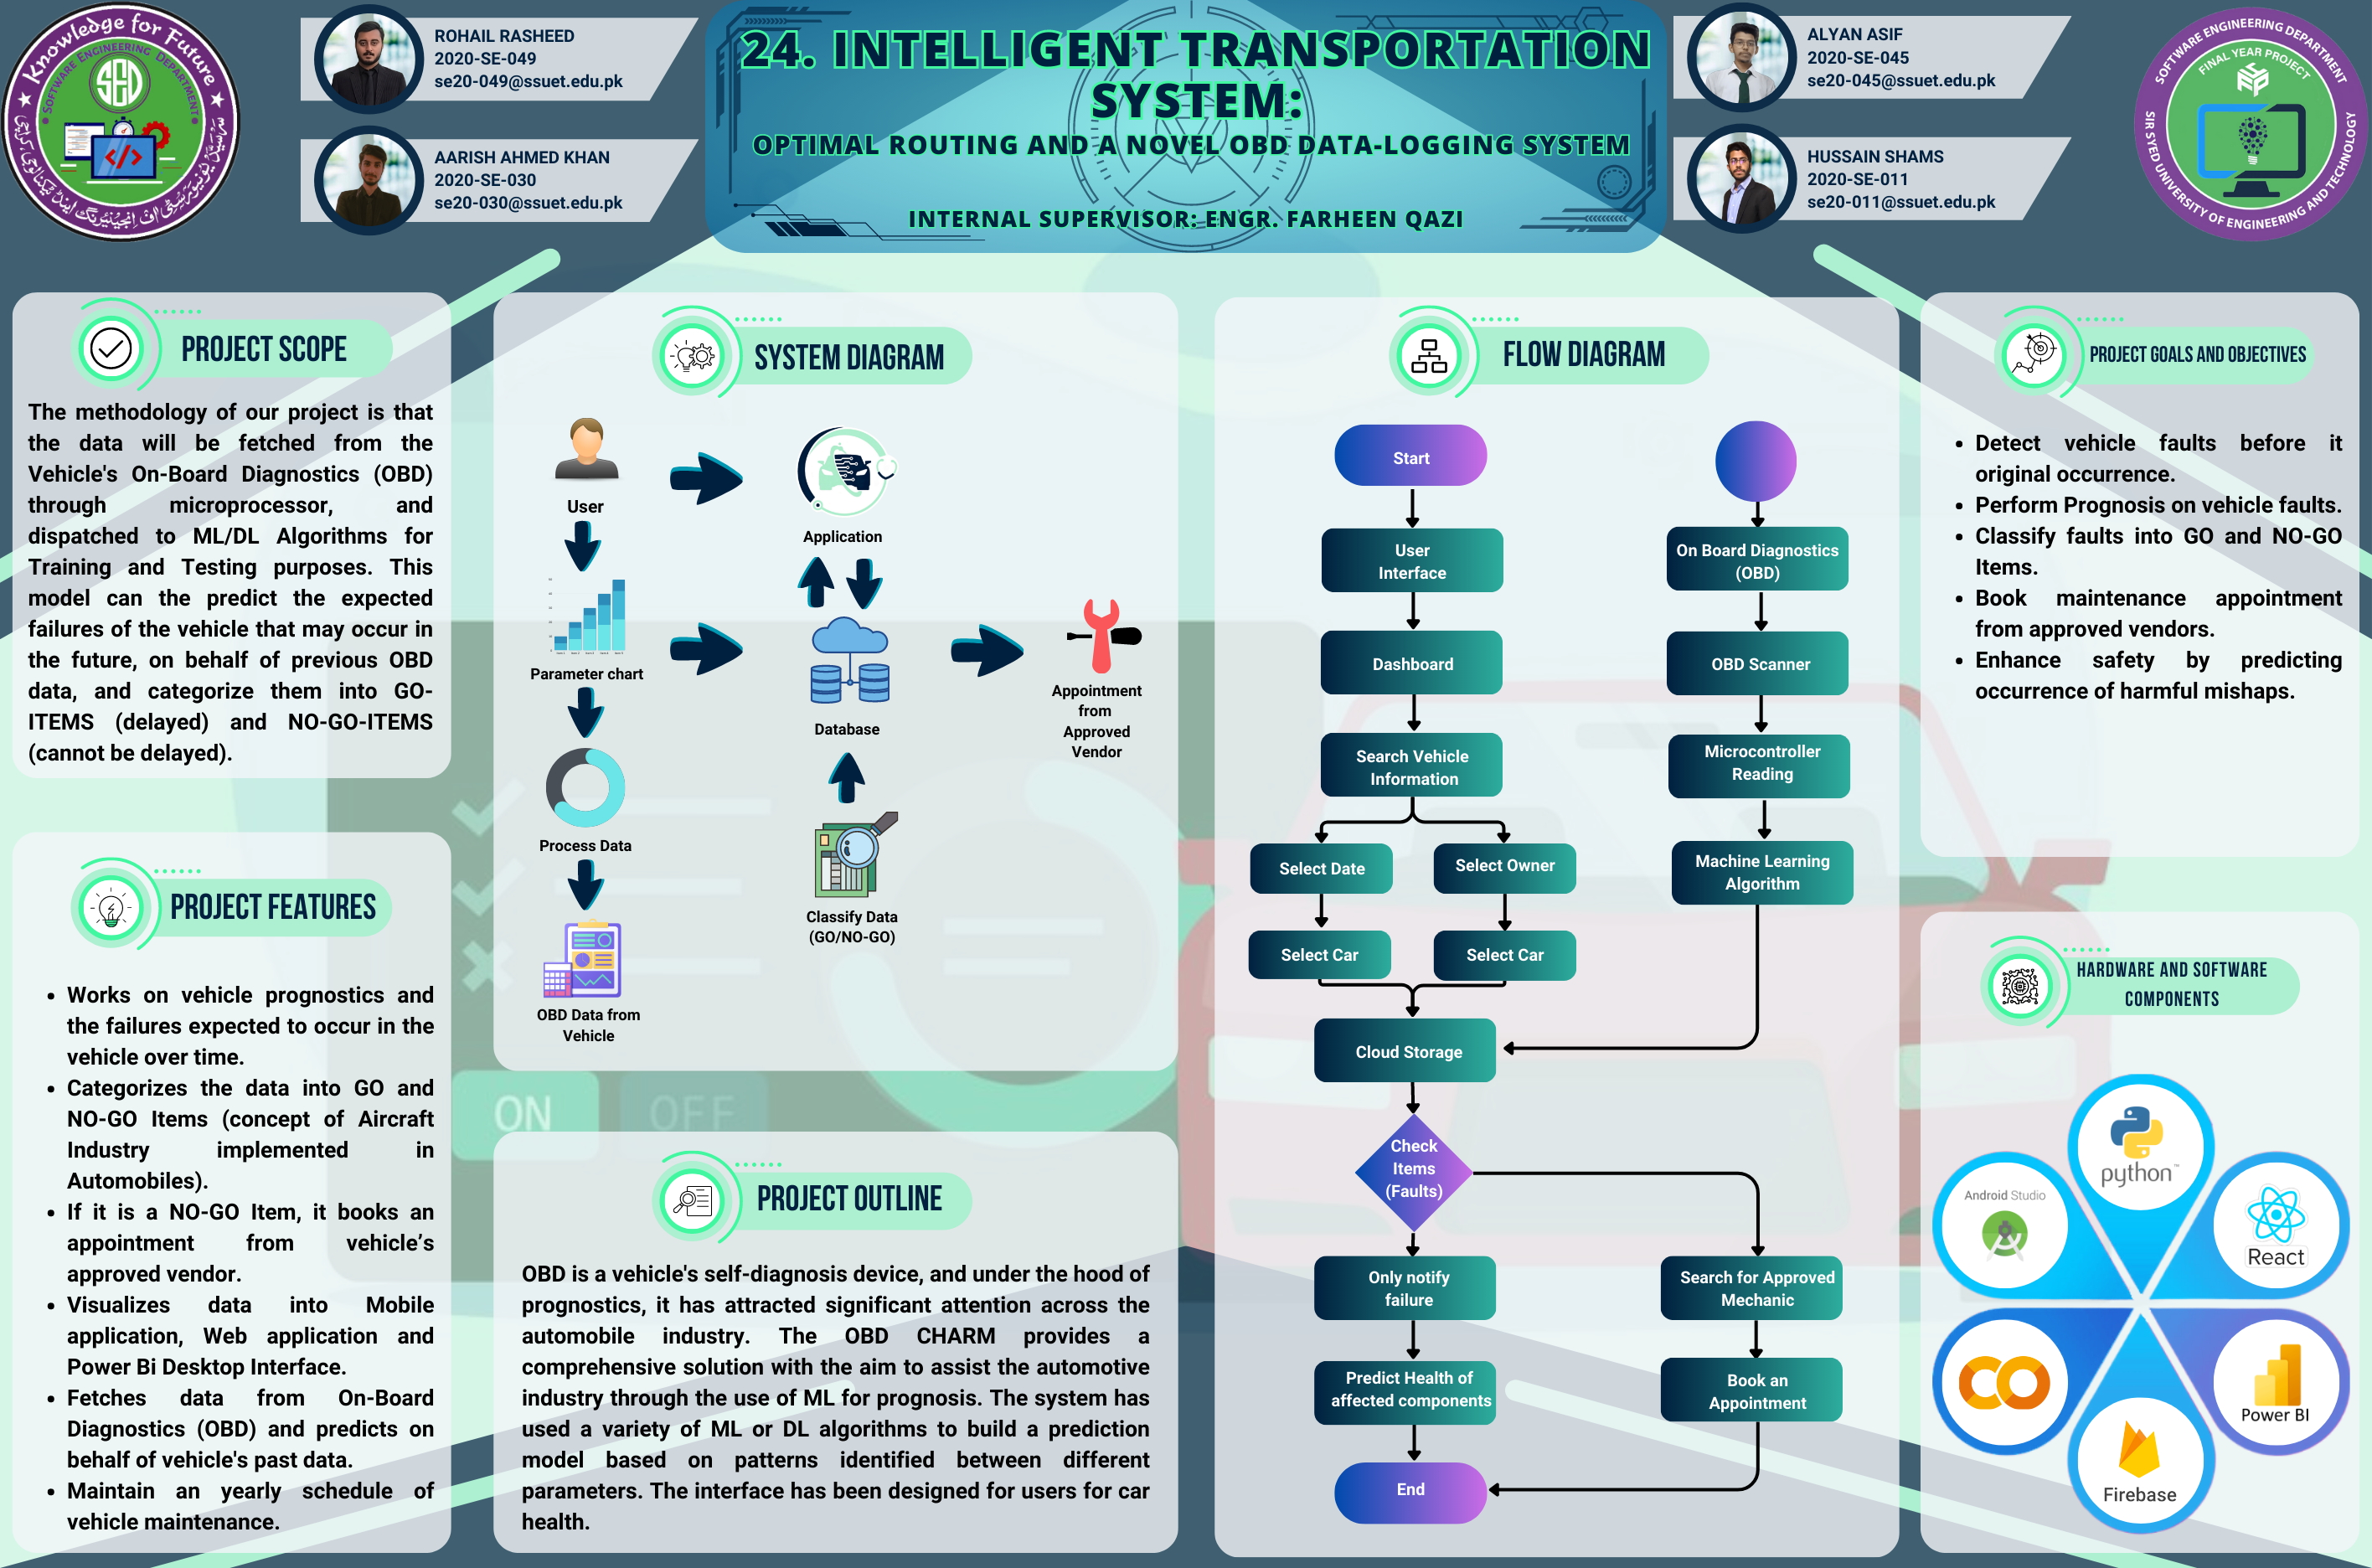

# Data Preprocessing Techniques
Here, we are importing the dataset and performing Data Preprocessing in order to make further processing. Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves preparing and cleaning the raw data to make it suitable for further analysis or model training.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from google.colab import files
import io

df = files.upload()

In [ ]:
df = pd.read_csv(io.StringIO(df['live1.csv'].decode('utf-8')))

df

KeyError: 'live1.csv'

In [ ]:
print("Data set shape :: ",df.shape)

In [ ]:
df.head(6)

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# **Viewing the uploaded Dataset**

In [ ]:
df.head(10)

In [ ]:
df.tail(20)

# **Checking Non Null Values**

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

# **Check Non-Null values by heatmap Visualization**

<Axes: >

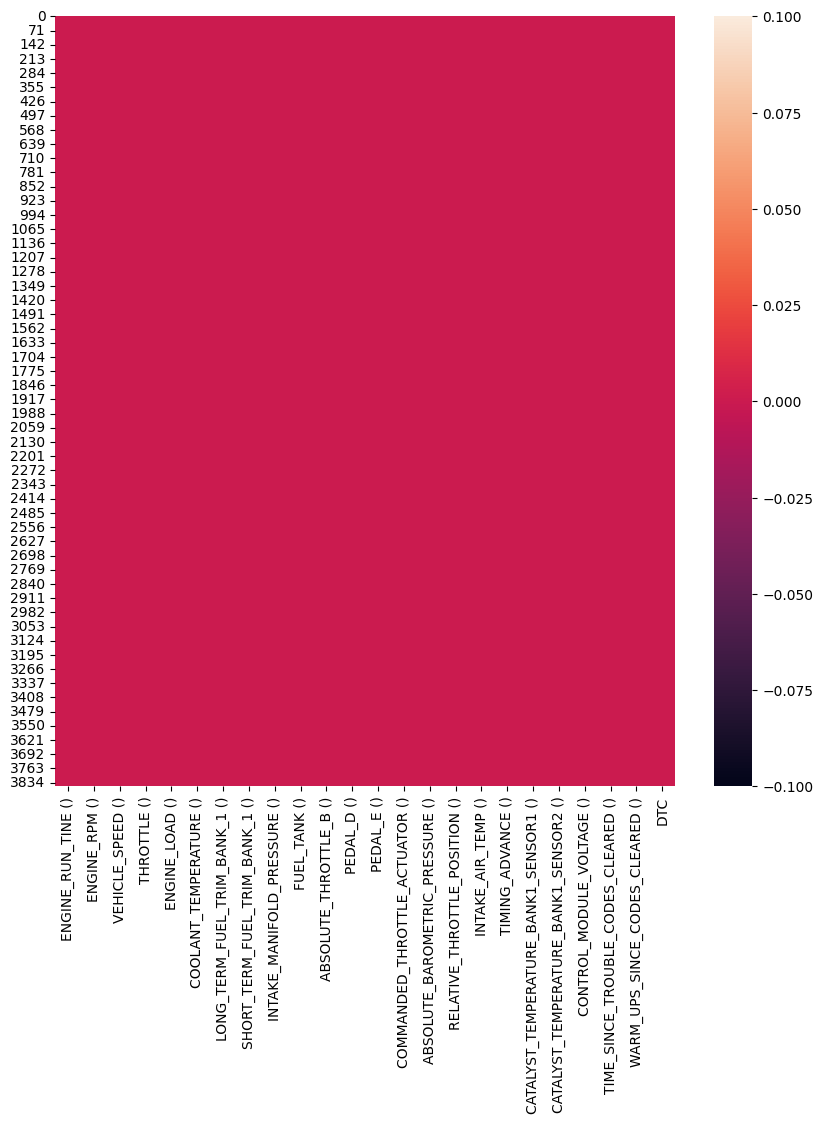

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [ ]:
null_var = df.isnull().sum()/ df.shape[0] * 100
null_var

ENGINE_RUN_TINE ()                       0.0
ENGINE_RPM ()                            0.0
VEHICLE_SPEED ()                         0.0
THROTTLE ()                              0.0
ENGINE_LOAD ()                           0.0
COOLANT_TEMPERATURE ()                   0.0
LONG_TERM_FUEL_TRIM_BANK_1 ()            0.0
SHORT_TERM_FUEL_TRIM_BANK_1 ()           0.0
INTAKE_MANIFOLD_PRESSURE ()              0.0
FUEL_TANK ()                             0.0
ABSOLUTE_THROTTLE_B ()                   0.0
PEDAL_D ()                               0.0
PEDAL_E ()                               0.0
COMMANDED_THROTTLE_ACTUATOR ()           0.0
ABSOLUTE_BAROMETRIC_PRESSURE ()          0.0
RELATIVE_THROTTLE_POSITION ()            0.0
INTAKE_AIR_TEMP ()                       0.0
TIMING_ADVANCE ()                        0.0
CATALYST_TEMPERATURE_BANK1_SENSOR1 ()    0.0
CATALYST_TEMPERATURE_BANK1_SENSOR2 ()    0.0
CONTROL_MODULE_VOLTAGE ()                0.0
TIME_SINCE_TROUBLE_CODES_CLEARED ()      0.0
WARM_UPS_S

In [ ]:
drop_col = null_var[null_var > 80].keys()
drop_col

Index([], dtype='object')

In [ ]:
df.shape

(3853, 24)

In [ ]:
num_var = df.select_dtypes(include = ["int64", "float64"]).columns
num_var

Index(['ENGINE_RUN_TINE ()', 'ENGINE_RPM ()', 'VEHICLE_SPEED ()',
       'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()',
       'LONG_TERM_FUEL_TRIM_BANK_1 ()', 'SHORT_TERM_FUEL_TRIM_BANK_1 ()',
       'INTAKE_MANIFOLD_PRESSURE ()', 'FUEL_TANK ()', 'ABSOLUTE_THROTTLE_B ()',
       'PEDAL_D ()', 'PEDAL_E ()', 'COMMANDED_THROTTLE_ACTUATOR ()',
       'ABSOLUTE_BAROMETRIC_PRESSURE ()', 'RELATIVE_THROTTLE_POSITION ()',
       'INTAKE_AIR_TEMP ()', 'TIMING_ADVANCE ()',
       'CATALYST_TEMPERATURE_BANK1_SENSOR1 ()',
       'CATALYST_TEMPERATURE_BANK1_SENSOR2 ()', 'CONTROL_MODULE_VOLTAGE ()',
       'TIME_SINCE_TROUBLE_CODES_CLEARED ()',
       'WARM_UPS_SINCE_CODES_CLEARED ()', 'DTC'],
      dtype='object')

<ipython-input-78-0c2660e63e15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TIME_SINCE_TROUBLE_CODES_CLEARED ()'])


<Axes: xlabel='TIME_SINCE_TROUBLE_CODES_CLEARED ()', ylabel='Density'>

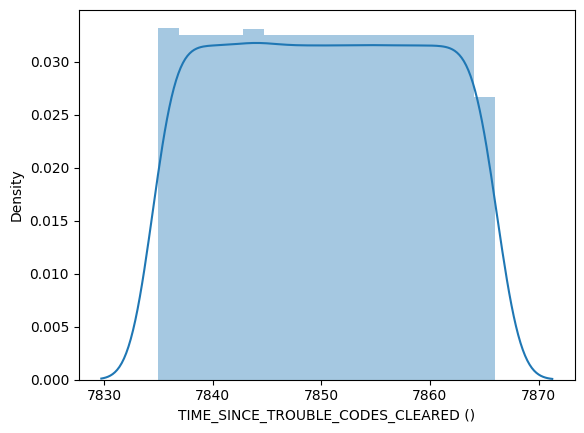

In [ ]:
sns.distplot(df['TIME_SINCE_TROUBLE_CODES_CLEARED ()'])

<ipython-input-79-889e1667ccea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ENGINE_LOAD ()'])


<Axes: xlabel='ENGINE_LOAD ()', ylabel='Density'>

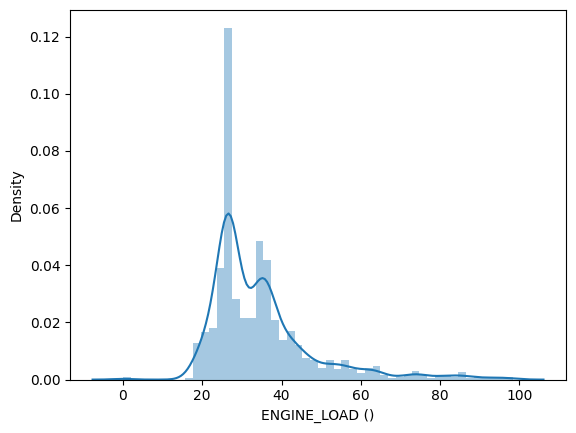

In [ ]:
sns.distplot(df['ENGINE_LOAD ()'])

<ipython-input-80-7d347ff77ca7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],bins =10)
<ipython-input-80-7d347ff77ca7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],bins =10)
<ipython-input-80-7d347ff77ca7>:5: UserWarning: 

`distplot` is a deprecated function and will be 

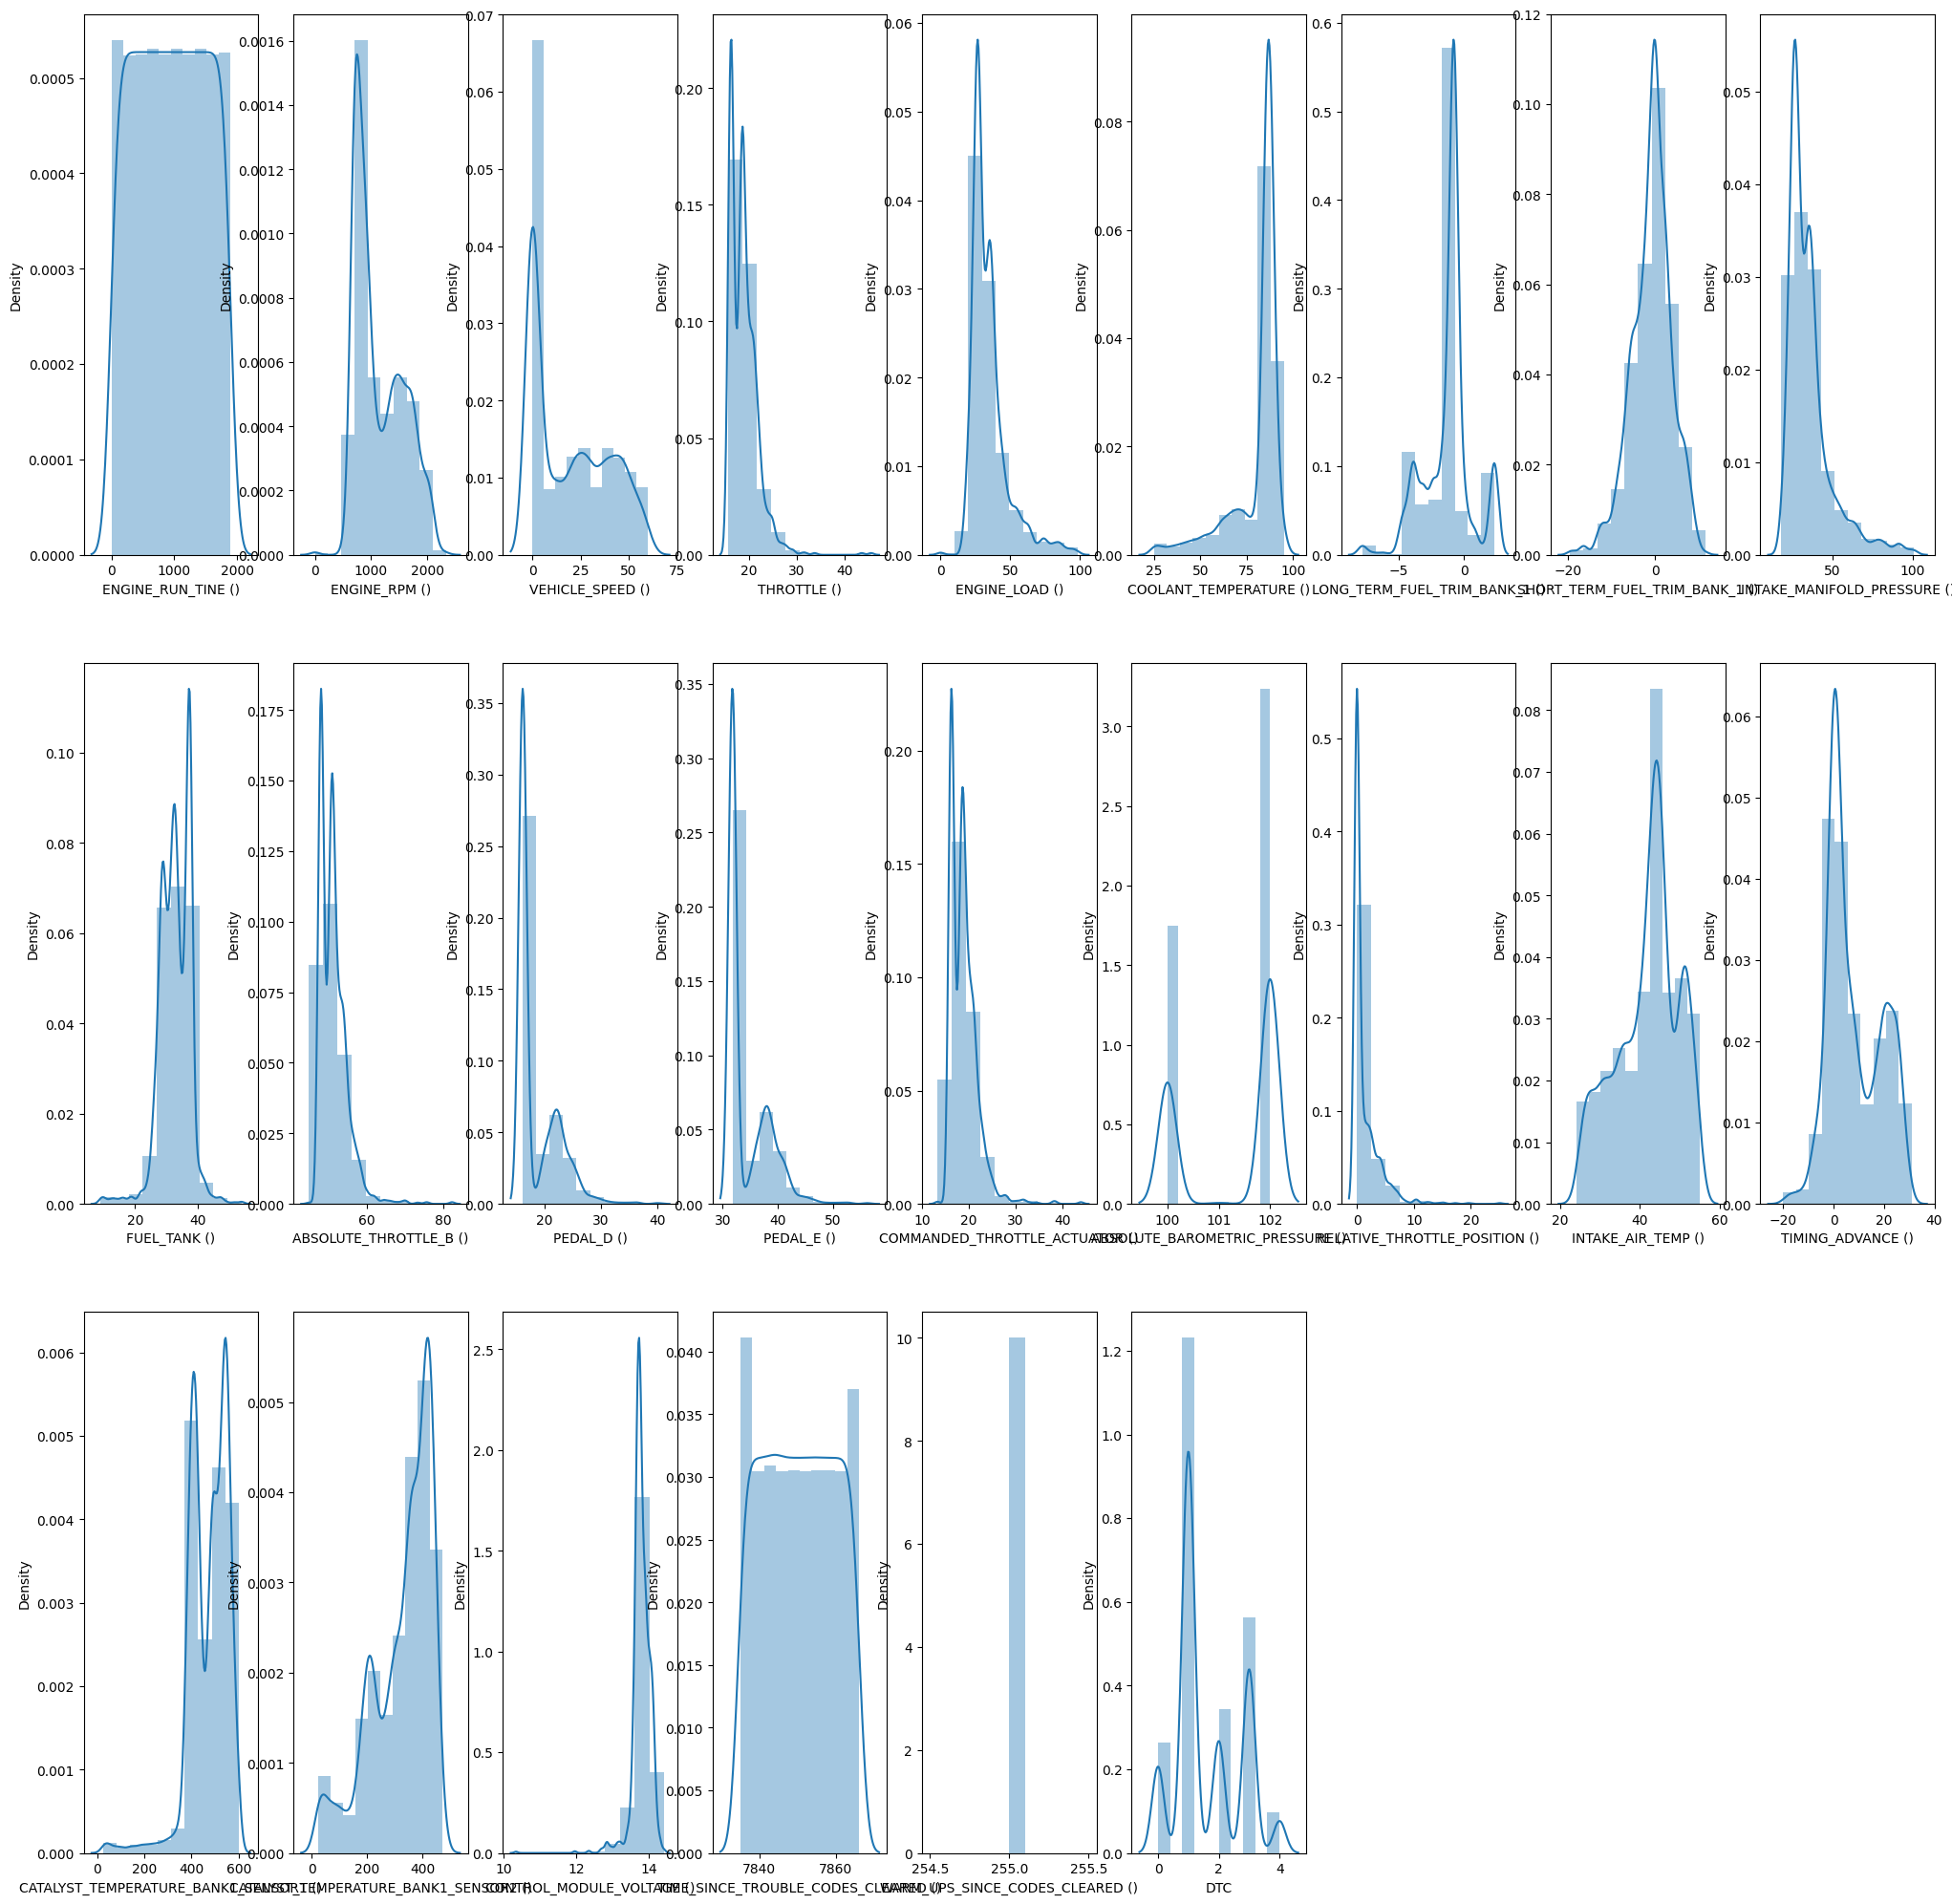

In [ ]:
plt.figure(figsize=(25,25))

for i, var in enumerate(num_var):
    plt.subplot(3,9,i+1)
    sns.distplot(df[var],bins =10)

# Data Visualization Techniques
Here, we are performing Data Visualization techniques in order to find the hidden patterns and strong relationship between the features. Data visualization after data preprocessing in machine learning refers to the process of creating graphical representations or visualizations of the preprocessed data. It is an essential step in understanding and exploring the data, identifying patterns, trends, and relationships, and gaining insights that may not be evident from raw data or numerical summaries alone.

In [ ]:
df.describe()

ENGINE_RUN_TINE ()  ENGINE_RPM ()  VEHICLE_SPEED ()  THROTTLE ()  \
count         3853.000000    3853.000000       3853.000000  3853.000000   
mean           944.720997    1139.646444         19.578510    18.914012   
std            547.612605     426.717558         19.463651     2.846920   
min              0.000000       0.000000          0.000000    15.686275   
25%            470.000000     754.500000          0.000000    16.470589   
50%            945.000000     971.750000         16.000000    18.431372   
75%           1418.000000    1496.750000         37.000000    20.392157   
max           1893.000000    2334.250000         60.000000    45.490196   

       ENGINE_LOAD ()  COOLANT_TEMPERATURE ()  LONG_TERM_FUEL_TRIM_BANK_1 ()  \
count     3853.000000             3853.000000                    3853.000000   
mean        34.701149               80.605762                      -1.200972   
std         13.338597               13.591008                       1.803688   
min          0.000000               25.000000                      -7.812500   
25%         26.274509               81.000000                      -2.343750   
50%         30.588236               86.000000                      -0.781250   
75%         38.039215               88.000000                      -0.781250   
max         98.431374               95.000000                       2.343750   

       SHORT_TERM_FUEL_TRIM_BANK_1 ()  INTAKE_MANIFOLD_PRESSURE ()  \
count                     3853.000000                  3853.000000   
mean                        -0.755296                    35.579808   
std                          4.574067                    13.785298   
min                        -19.531250                    18.000000   
25%                         -3.125000                    26.000000   
50%                          0.000000                    32.000000   
75%                          2.343750                    39.000000   
max                         11.718750                   101.000000   

       FUEL_TANK ()  ABSOLUTE_THROTTLE_B ()   PEDAL_D ()   PEDAL_E ()  \
count   3853.000000             3853.000000  3853.000000  3853.000000   
mean      32.783825               51.111789    18.513204    34.308586   
std        4.790601                3.600117     3.705952     3.824938   
min        9.019608               44.705883    16.078432    31.764706   
25%       29.411764               47.843136    16.078432    31.764706   
50%       32.941177               50.588234    16.078432    31.764706   
75%       37.254902               52.941177    21.568628    37.254902   
max       53.725491               82.352943    40.000000    56.078430   

       COMMANDED_THROTTLE_ACTUATOR ()  ABSOLUTE_BAROMETRIC_PRESSURE ()  \
count                     3853.000000                      3853.000000   
mean                        18.879101                       101.297431   
std                          2.857144                         0.953371   
min                         13.333333                       100.000000   
25%                         16.470589                       100.000000   
50%                         18.431372                       102.000000   
75%                         20.392157                       102.000000   
max                         43.921570                       102.000000   

       RELATIVE_THROTTLE_POSITION ()  INTAKE_AIR_TEMP ()  TIMING_ADVANCE ()  \
count                    3853.000000         3853.000000        3853.000000   
mean                        1.266138           41.964443           7.924474   
std                         2.413447            7.649753          10.476610   
min                         0.000000           24.000000         -20.000000   
25%                         0.000000           36.000000           0.000000   
50%                         0.000000           43.000000           4.000000   
75%                         1.960784           47.000000          18.000000   
max                   

# **Enquire the relationship b/w features by using Correlation Matrix**

<Axes: >

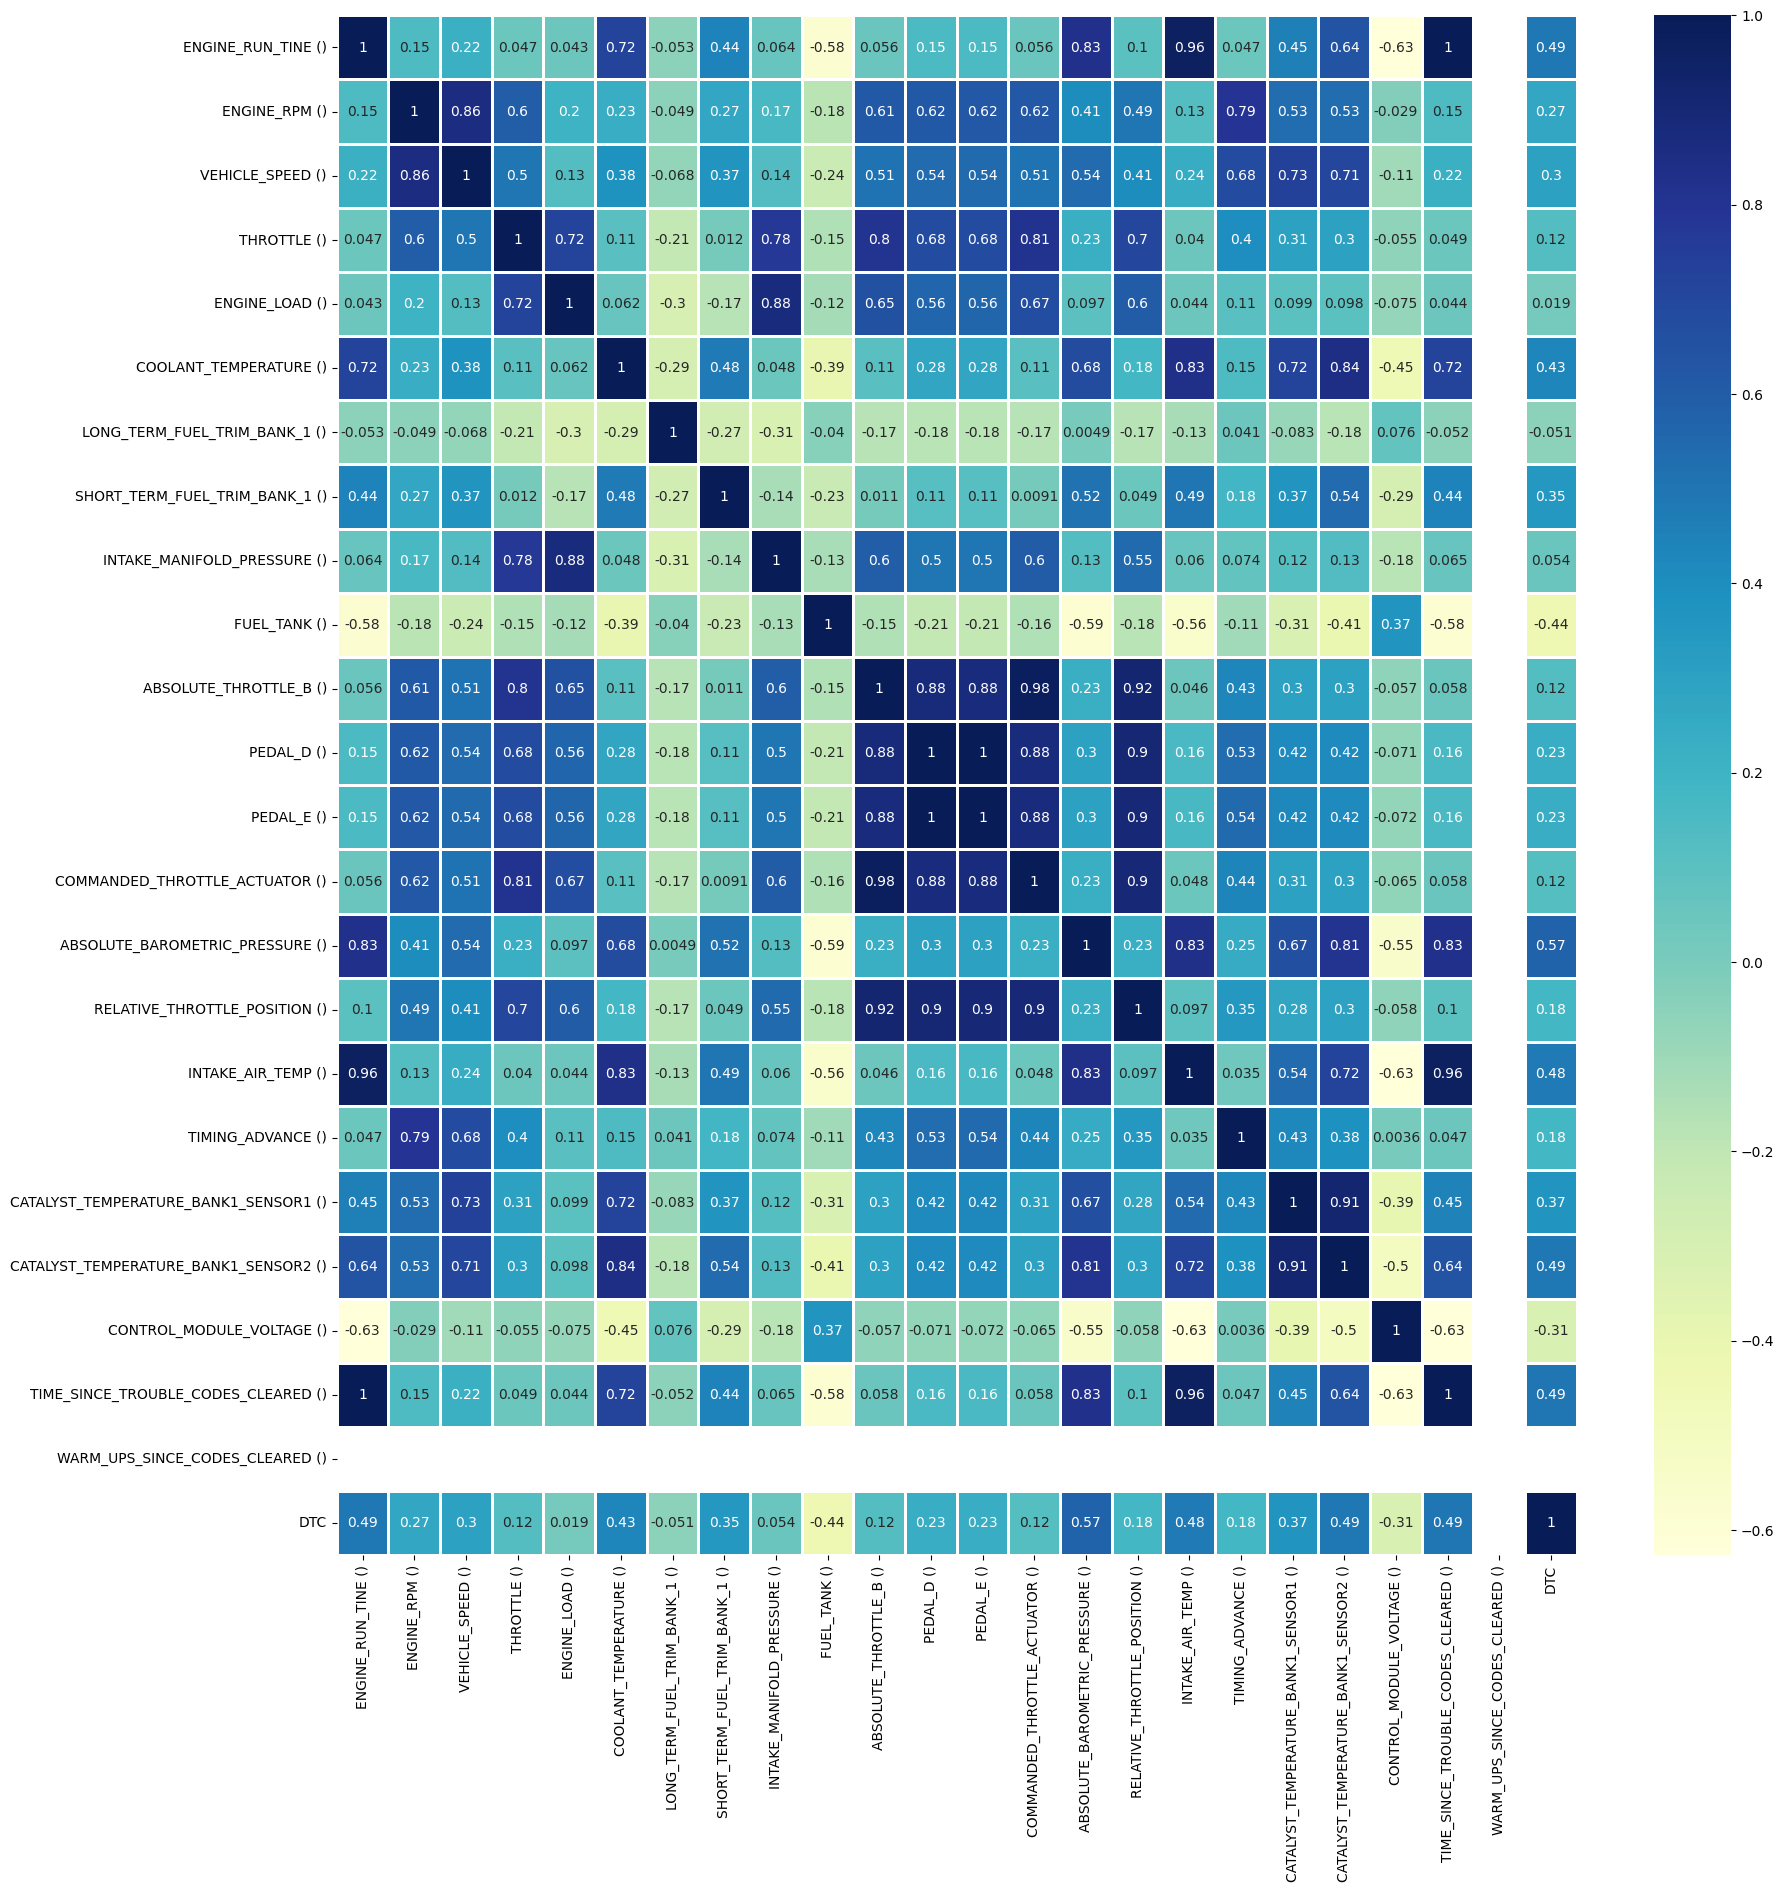

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap ='YlGnBu', linewidths=None)

In [ ]:
cols = [ 'ABSOLUTE_BAROMETRIC_PRESSURE ()', 'RELATIVE_THROTTLE_POSITION ()',
       'INTAKE_AIR_TEMP ()', 'TIMING_ADVANCE ()',
       'CATALYST_TEMPERATURE_BANK1_SENSOR1 ()',
       'CATALYST_TEMPERATURE_BANK1_SENSOR2 ()', 'CONTROL_MODULE_VOLTAGE ()',
       'TIME_SINCE_TROUBLE_CODES_CLEARED ()',
       'WARM_UPS_SINCE_CODES_CLEARED ()']
df1_drop_colmns = df.drop(cols, axis=1)

In [ ]:
df1_drop_colmns.columns

Index(['ENGINE_RUN_TINE ()', 'ENGINE_RPM ()', 'VEHICLE_SPEED ()',
       'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()',
       'LONG_TERM_FUEL_TRIM_BANK_1 ()', 'SHORT_TERM_FUEL_TRIM_BANK_1 ()',
       'INTAKE_MANIFOLD_PRESSURE ()', 'FUEL_TANK ()', 'ABSOLUTE_THROTTLE_B ()',
       'PEDAL_D ()', 'PEDAL_E ()', 'COMMANDED_THROTTLE_ACTUATOR ()', 'DTC'],
      dtype='object')

<Axes: >

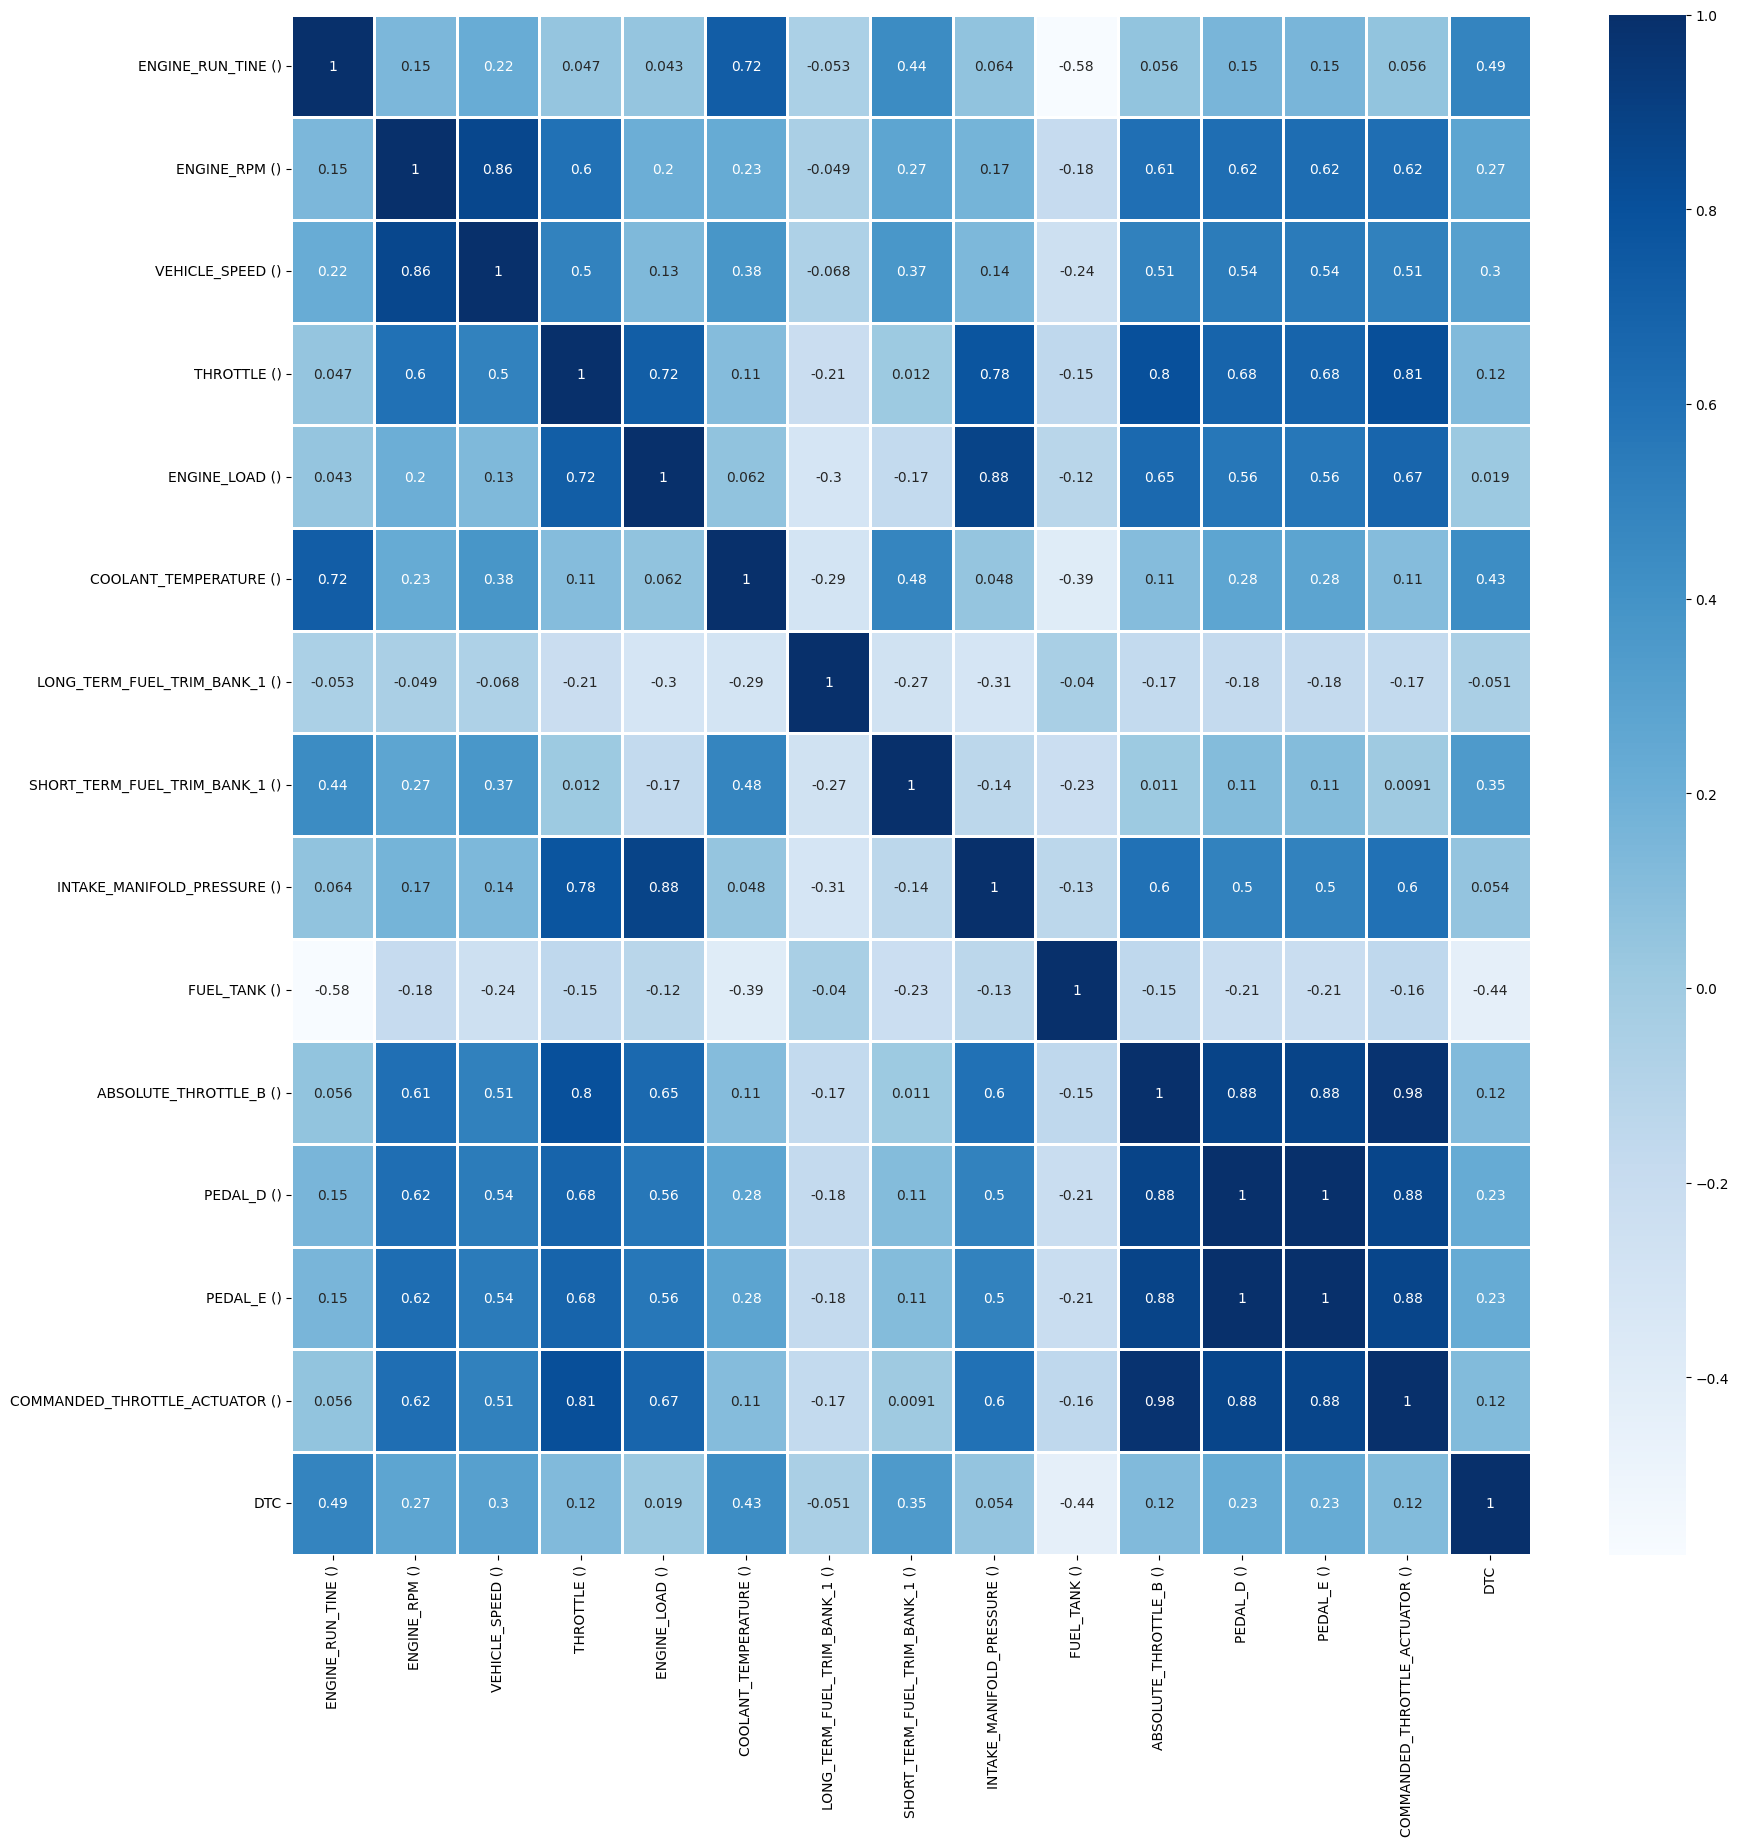

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1_drop_colmns.corr(), annot = True, cmap ='Blues', linewidths=None)

In [ ]:
cols = ['FUEL_TANK ()', 'ABSOLUTE_THROTTLE_B ()',
       'PEDAL_D ()', 'PEDAL_E ()', 'COMMANDED_THROTTLE_ACTUATOR ()']
df2_drop_colmns = df1_drop_colmns.drop(cols, axis=1)

In [ ]:
df2_drop_colmns.columns

Index(['ENGINE_RUN_TINE ()', 'ENGINE_RPM ()', 'VEHICLE_SPEED ()',
       'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()',
       'LONG_TERM_FUEL_TRIM_BANK_1 ()', 'SHORT_TERM_FUEL_TRIM_BANK_1 ()',
       'INTAKE_MANIFOLD_PRESSURE ()', 'DTC'],
      dtype='object')

<Axes: >

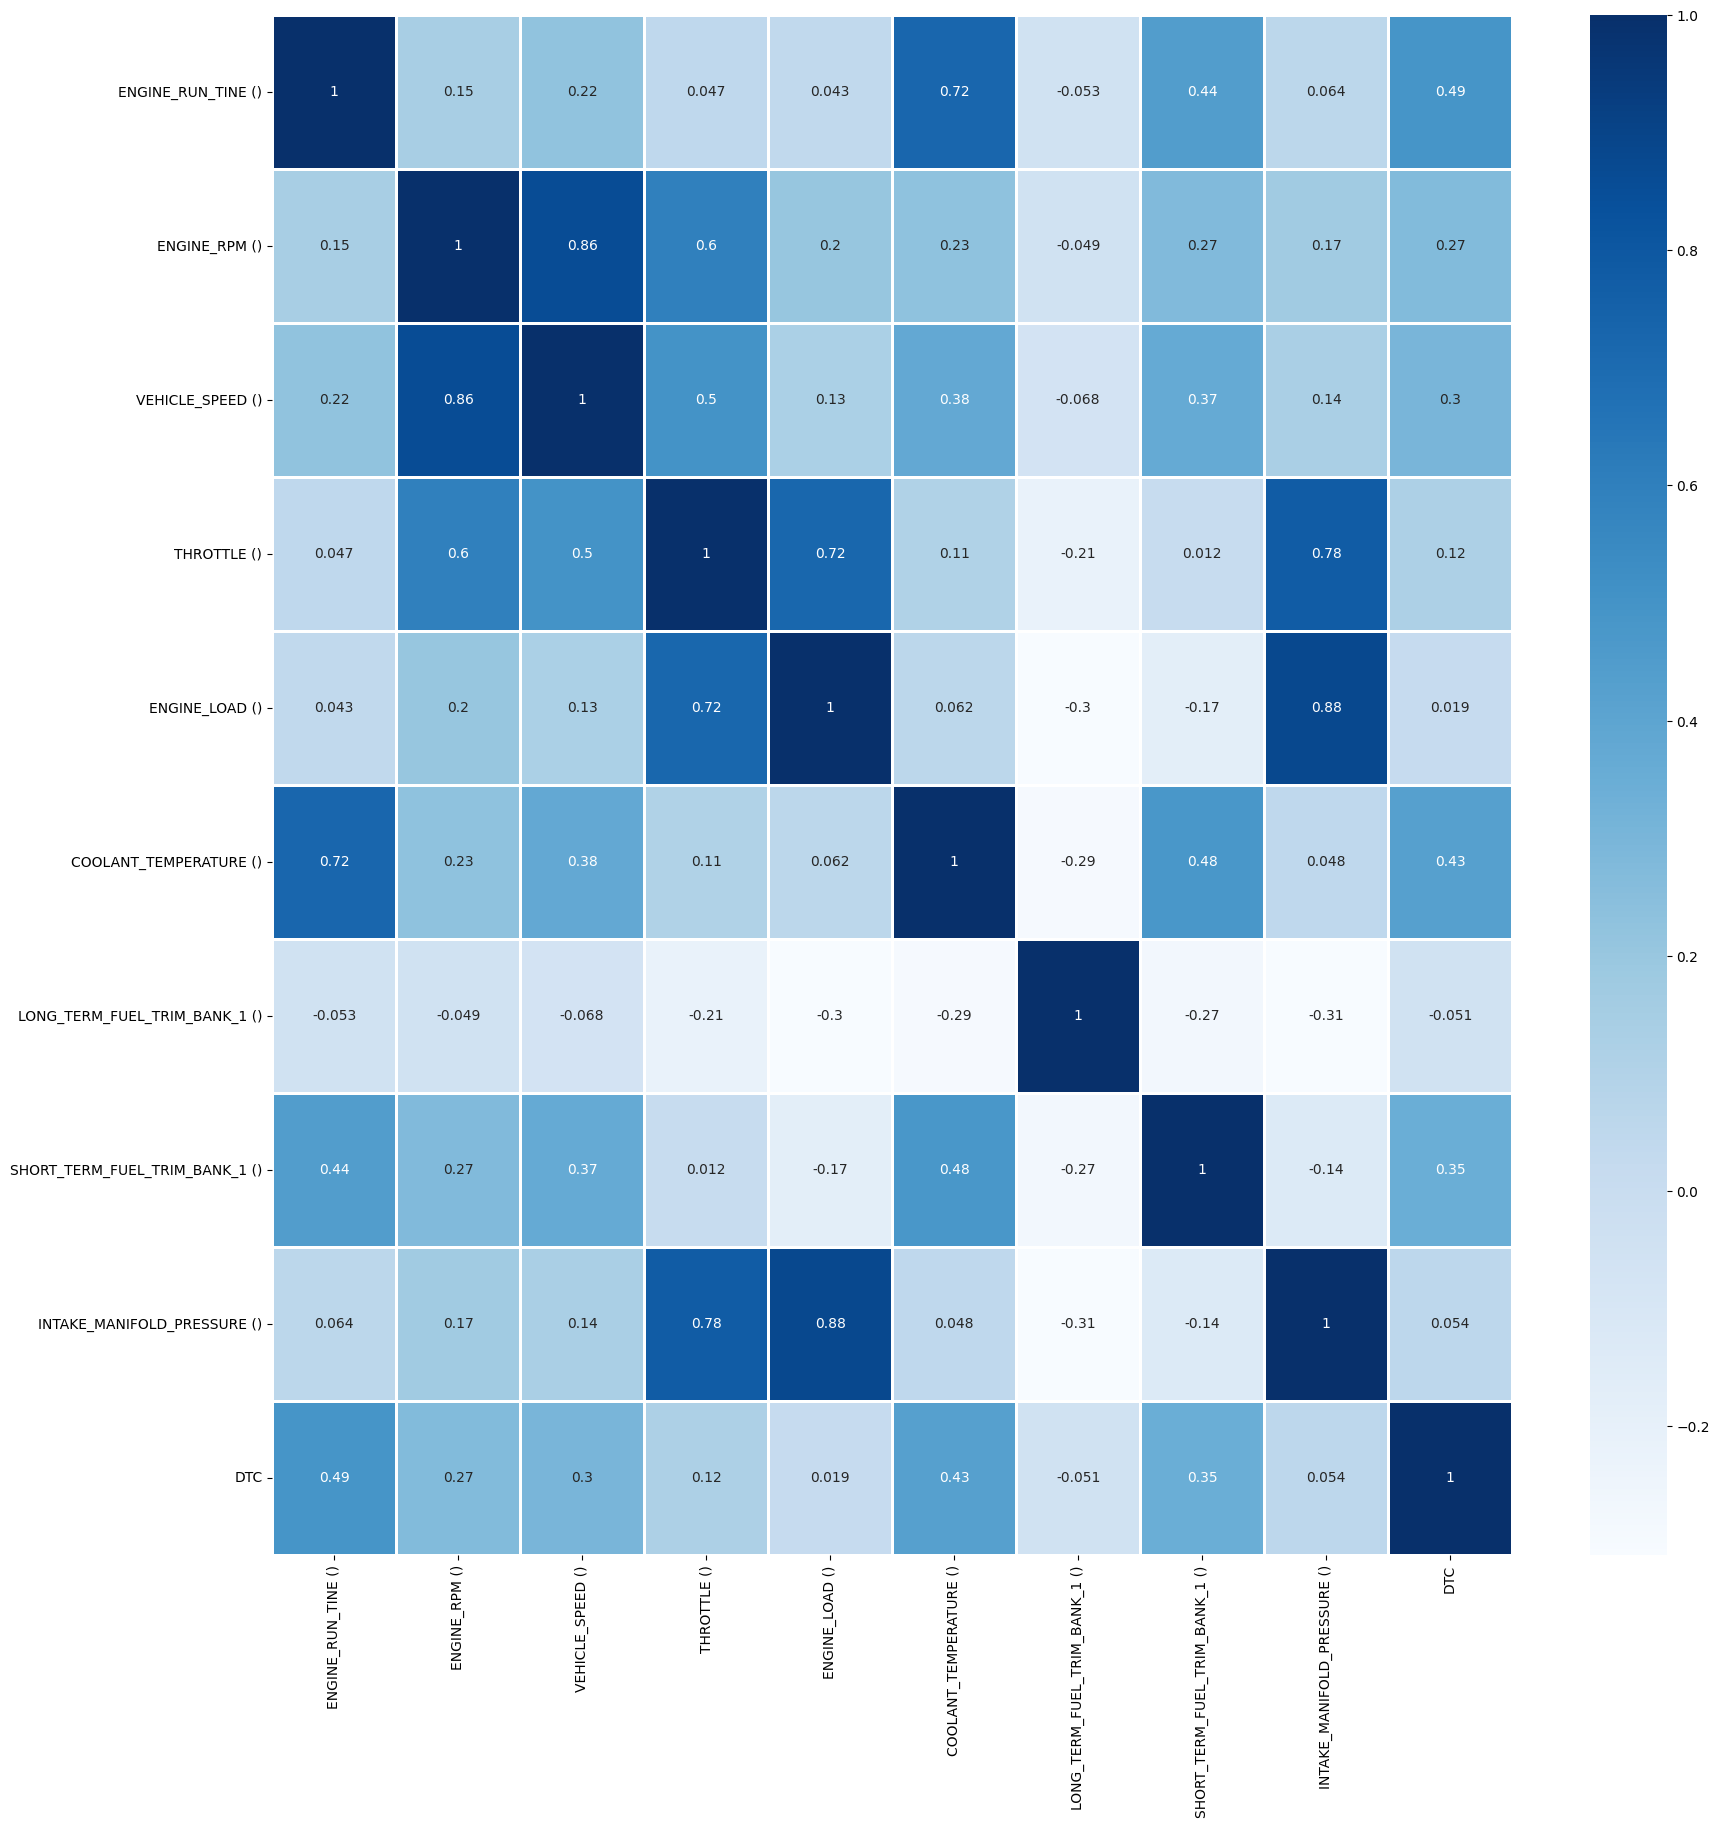

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df2_drop_colmns.corr(), annot = True, cmap ='Blues', linewidths=None)

In [ ]:
cols = ['SHORT_TERM_FUEL_TRIM_BANK_1 ()',
       'INTAKE_MANIFOLD_PRESSURE ()']
df3_drop_colmns = df2_drop_colmns.drop(cols, axis=1)

In [ ]:
df3_drop_colmns.columns

Index(['ENGINE_RUN_TINE ()', 'ENGINE_RPM ()', 'VEHICLE_SPEED ()',
       'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()',
       'LONG_TERM_FUEL_TRIM_BANK_1 ()', 'DTC'],
      dtype='object')

<Axes: >

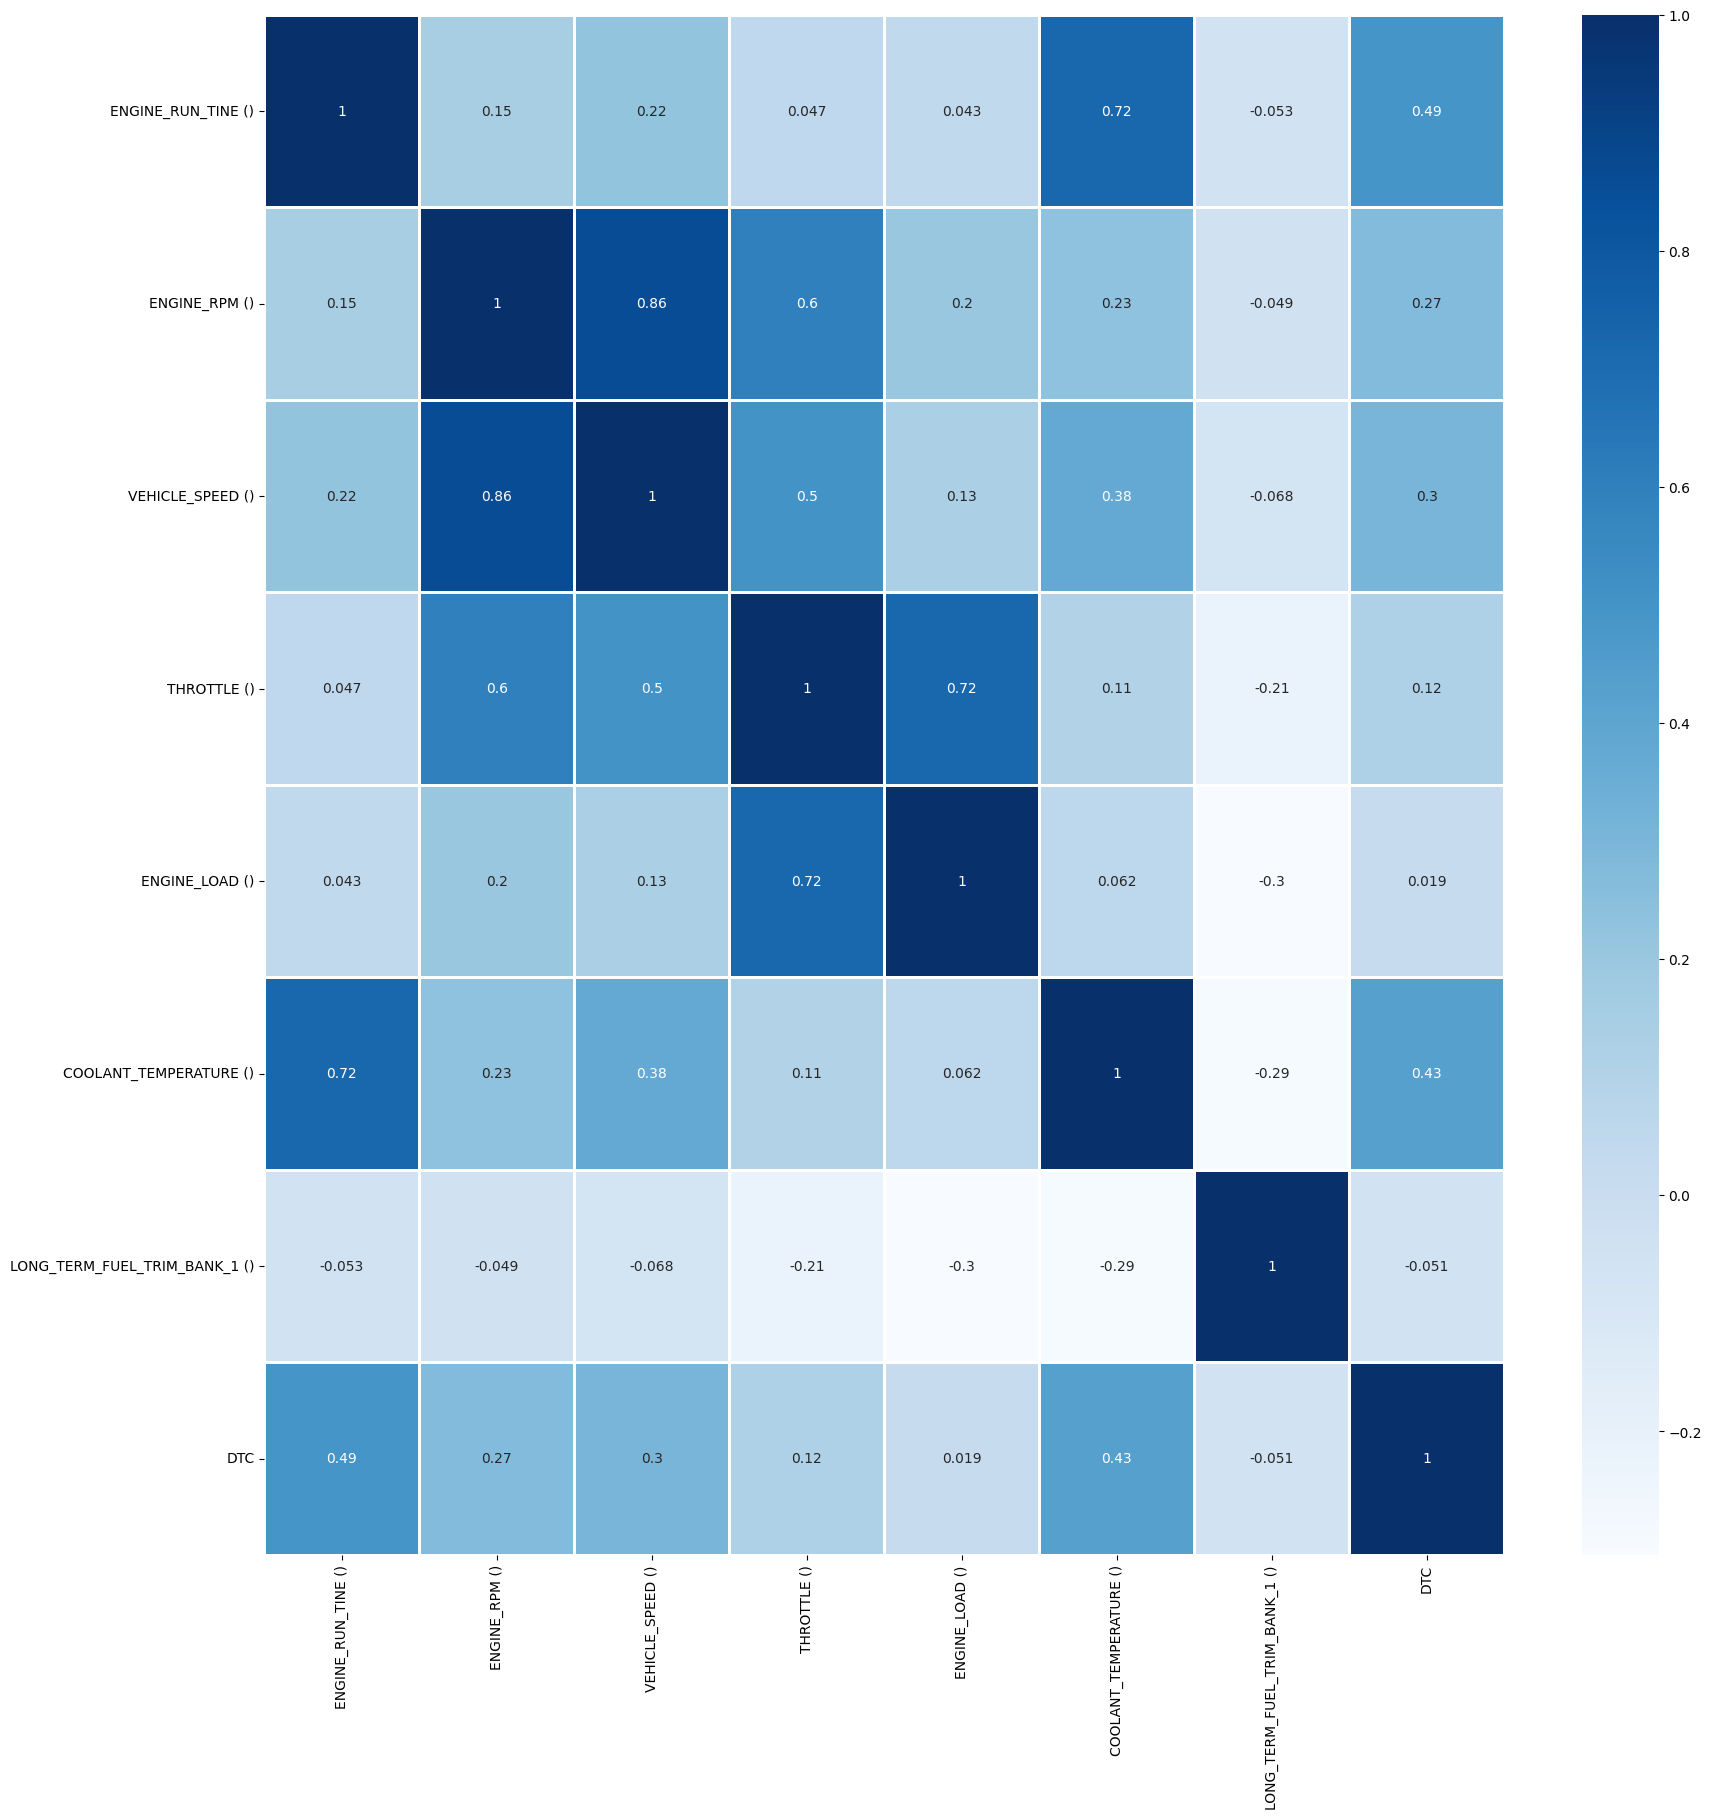

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df3_drop_colmns.corr(), annot = True, cmap ='Blues', linewidths=None)

In [ ]:
cols = ['LONG_TERM_FUEL_TRIM_BANK_1 ()']
df4_drop_colmns = df3_drop_colmns.drop(cols, axis=1)

In [ ]:
df4_drop_colmns.columns

Index(['ENGINE_RUN_TINE ()', 'ENGINE_RPM ()', 'VEHICLE_SPEED ()',
       'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()', 'DTC'],
      dtype='object')

<Axes: >

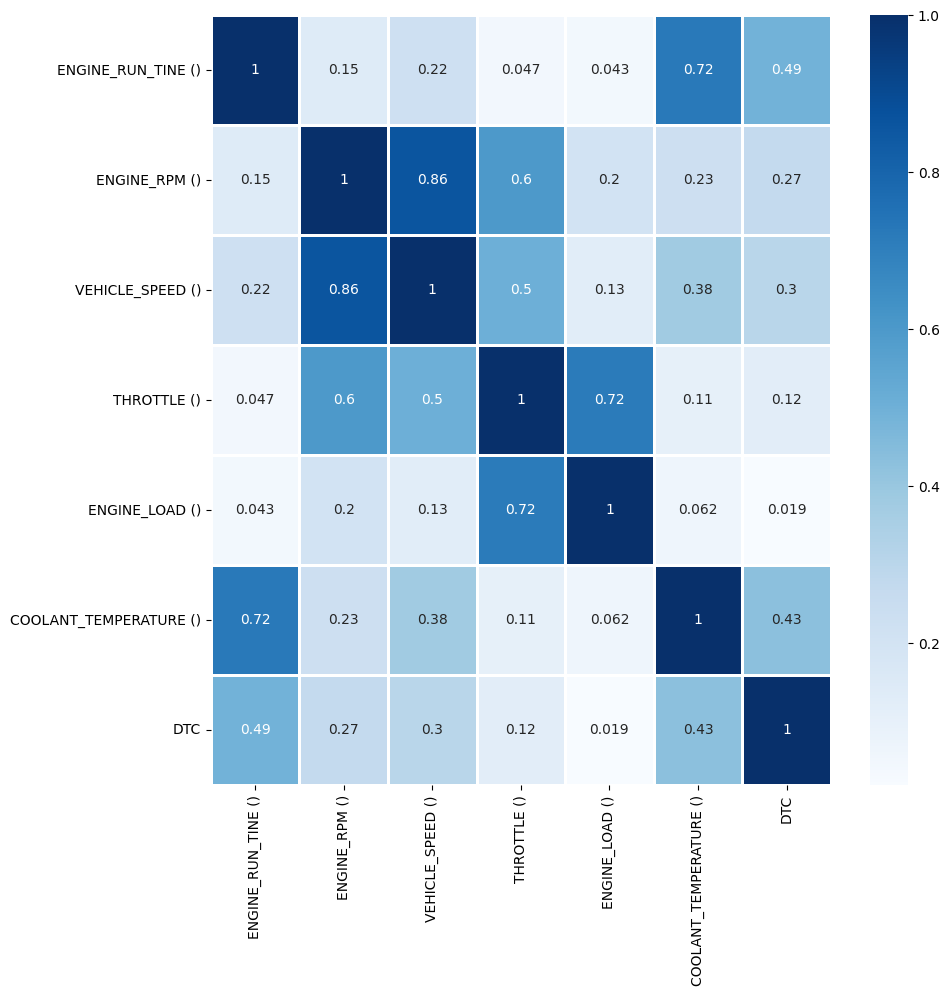

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df4_drop_colmns.corr(), annot = True, cmap ='Blues', linewidths=None)

# **Split the Data into X and Y Variables**

In [ ]:
# Converting the our data into matrix and vector.

# Extract feature variables and target variable
X = df4_drop_colmns[['ENGINE_RUN_TINE ()', 'ENGINE_RPM ()', 'VEHICLE_SPEED ()', 'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()']]
y = df4_drop_colmns['DTC']

print("The shape of X :: ",X.shape)
print("The shape of y :: ",y.shape)

The shape of X ::  (3853, 6)
The shape of y ::  (3853,)


# **Split the Dataset into Test and Train**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.45,random_state = 0)

print("The shape of X_train :: ",X_train.shape)
print("The shape of X_test :: ",X_test.shape)
print("The shape of y_train :: ",y_train.shape)
print("The shape of y_test :: ",y_test.shape)

The shape of X_train ::  (2119, 6)
The shape of X_test ::  (1734, 6)
The shape of y_train ::  (2119,)
The shape of y_test ::  (1734,)


In [ ]:
X_train.head(20)

ENGINE_RUN_TINE ()  ENGINE_RPM ()  VEHICLE_SPEED ()  THROTTLE ()  \
3660                1799        1289.00                28    16.862745   
1195                 584        1362.50                29    20.392157   
3798                1866        1520.25                 8    18.431372   
315                  151         992.75                 0    18.823530   
1604                 785         785.75                22    16.470589   
1210                 592        1139.00                26    17.647058   
926                  452         856.25                 0    18.039215   
133                   62         829.50                13    19.607843   
3824                1879         903.75                 5    21.176470   
3697                1817         857.75                 0    18.039215   
1927                 945        1536.50                44    17.254902   
2695                1324        1596.75                45    21.960785   
602                  292         709.25                 0    16.078432   
3604                1770         798.25                12    19.607843   
1103                 539         958.50                14    21.960785   
1399                 686        1685.75                48    19.607843   
203                   97         995.25                 0    17.647058   
1592                 780         895.25                37    16.470589   
3589                1763        1017.75                13    18.431372   
949                  465         857.00                 0    18.039215   

      ENGINE_LOAD ()  COOLANT_TEMPERATURE ()  
3660       29.019608                      86  
1195       35.294117                      87  
3798       38.039215                      89  
315        32.941177                      58  
1604       25.882353                      87  
1210       21.568628                      87  
926        35.686275                      80  
133        41.960785                      43  
3824       74.117645                      88  
3697       33.333332                      88  
1927       18.431372                      86  
2695       47.058823                      86  
602        27.058823                      68  
3604       42.352940                      86  
1103       55.686275                      86  
1399       27.058823                      86  
203        28.235294                      50  
1592       20.000000                      86  
3589       33.333332                      85  
949        35.294117                      81

# **Feature Scaling through Standard Scaler (Z-Score Normalization)**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standardsc = StandardScaler()

In [ ]:
standardsc.fit(X_train)

StandardScaler()

In [ ]:
standardsc.mean_

array([ 958.0250118 , 1148.35677206,   20.32987258,   18.97732024,
         34.991348  ,   80.95233601])

In [ ]:
standardsc.scale_

array([540.81309351, 423.69936794,  19.52888277,   2.85817293,
        13.52694172,  13.29578178])

In [ ]:
X_train.describe()

ENGINE_RUN_TINE ()  ENGINE_RPM ()  VEHICLE_SPEED ()  THROTTLE ()  \
count         2119.000000    2119.000000       2119.000000  2119.000000   
mean           958.025012    1148.356772         20.329873    18.977320   
std            540.940749     423.799380         19.533492     2.858848   
min              0.000000       0.000000          0.000000    15.686275   
25%            497.000000     761.500000          0.000000    16.470589   
50%            972.000000     980.250000         19.000000    18.823530   
75%           1416.000000    1506.500000         37.000000    20.392157   
max           1893.000000    2334.250000         60.000000    45.490196   

       ENGINE_LOAD ()  COOLANT_TEMPERATURE ()  
count     2119.000000             2119.000000  
mean        34.991348               80.952336  
std         13.530135               13.298920  
min          0.000000               25.000000  
25%         26.666666               82.000000  
50%         31.372549               86.000000  
75%         38.039215               88.000000  
max         98.431374               95.000000

In [ ]:
X_train_standardsc = standardsc.transform(X_train)
X_test_standardsc = standardsc.transform(X_test)

In [ ]:
X_train_standardsc

array([[ 1.55501965,  0.33194109,  0.39275813, -0.73983461, -0.44147008,
         0.37964402],
       [-0.69159755,  0.50541314,  0.44396433,  0.4950144 ,  0.02238266,
         0.45485584],
       [ 1.67890718,  0.87772901, -0.631366  , -0.19101302,  0.22531826,
         0.60527949],
       ...,
       [-0.27185919, -1.04580466, -1.04101565, -1.15145071, -0.73137803,
         0.53006766],
       [ 0.59535354,  0.73552913,  0.44396433,  0.76942502,  1.26898721,
         0.60527949],
       [ 0.70999573,  0.96800529,  1.26326363,  0.35780892, -0.23853448,
         0.37964402]])

In [ ]:
X_test_standardsc

array([[ 1.11863968, -1.04580466, -1.04101565, -1.01424522, -0.64440575,
         0.68049131],
       [ 1.58830287, -0.68587964, -1.04101565, -0.3282185 , -0.12257139,
         0.53006766],
       [-0.22933064,  1.01933885, -0.17051014,  2.14147986,  3.90715012,
         0.53006766],
       ...,
       [-1.5181308 , -0.83929031, -0.88739703, -0.05380718,  0.51522636,
        -1.95192253],
       [-1.27035573, -1.03105363, -1.04101565, -0.87703974, -0.58642413,
        -1.04938064],
       [ 0.38825796, -0.45576365,  1.46808846, -0.05380718, -0.006608  ,
         0.37964402]])

In [ ]:
X_train_standardsc = pd.DataFrame(X_train_standardsc, columns = ['ENGINE_RUN_TINE ()','ENGINE_RPM ()', 'VEHICLE_SPEED ()', 'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()'])
X_test_standardsc = pd.DataFrame(X_test_standardsc, columns = ['ENGINE_RUN_TINE ()','ENGINE_RPM ()', 'VEHICLE_SPEED ()', 'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()'])

In [ ]:
X_train_standardsc.head()

ENGINE_RUN_TINE ()  ENGINE_RPM ()  VEHICLE_SPEED ()  THROTTLE ()  \
0            1.555020       0.331941          0.392758    -0.739835   
1           -0.691598       0.505413          0.443964     0.495014   
2            1.678907       0.877729         -0.631366    -0.191013   
3           -1.492244      -0.367258         -1.041016    -0.053807   
4           -0.319935      -0.855811          0.085521    -0.877040   

   ENGINE_LOAD ()  COOLANT_TEMPERATURE ()  
0       -0.441470                0.379644  
1        0.022383                0.454856  
2        0.225318                0.605279  
3       -0.151562               -1.726287  
4       -0.673396                0.454856

In [ ]:
X_train_standardsc.describe().round(2)

ENGINE_RUN_TINE ()  ENGINE_RPM ()  VEHICLE_SPEED ()  THROTTLE ()  \
count             2119.00        2119.00           2119.00      2119.00   
mean                 0.00           0.00              0.00         0.00   
std                  1.00           1.00              1.00         1.00   
min                 -1.77          -2.71             -1.04        -1.15   
25%                 -0.85          -0.91             -1.04        -0.88   
50%                  0.03          -0.40             -0.07        -0.05   
75%                  0.85           0.85              0.85         0.50   
max                  1.73           2.80              2.03         9.28   

       ENGINE_LOAD ()  COOLANT_TEMPERATURE ()  
count         2119.00                 2119.00  
mean            -0.00                    0.00  
std              1.00                    1.00  
min             -2.59                   -4.21  
25%             -0.62                    0.08  
50%             -0.27                    0.38  
75%              0.23                    0.53  
max              4.69                    1.06

# **Visualize the features in order to observe the relationship b/w them**

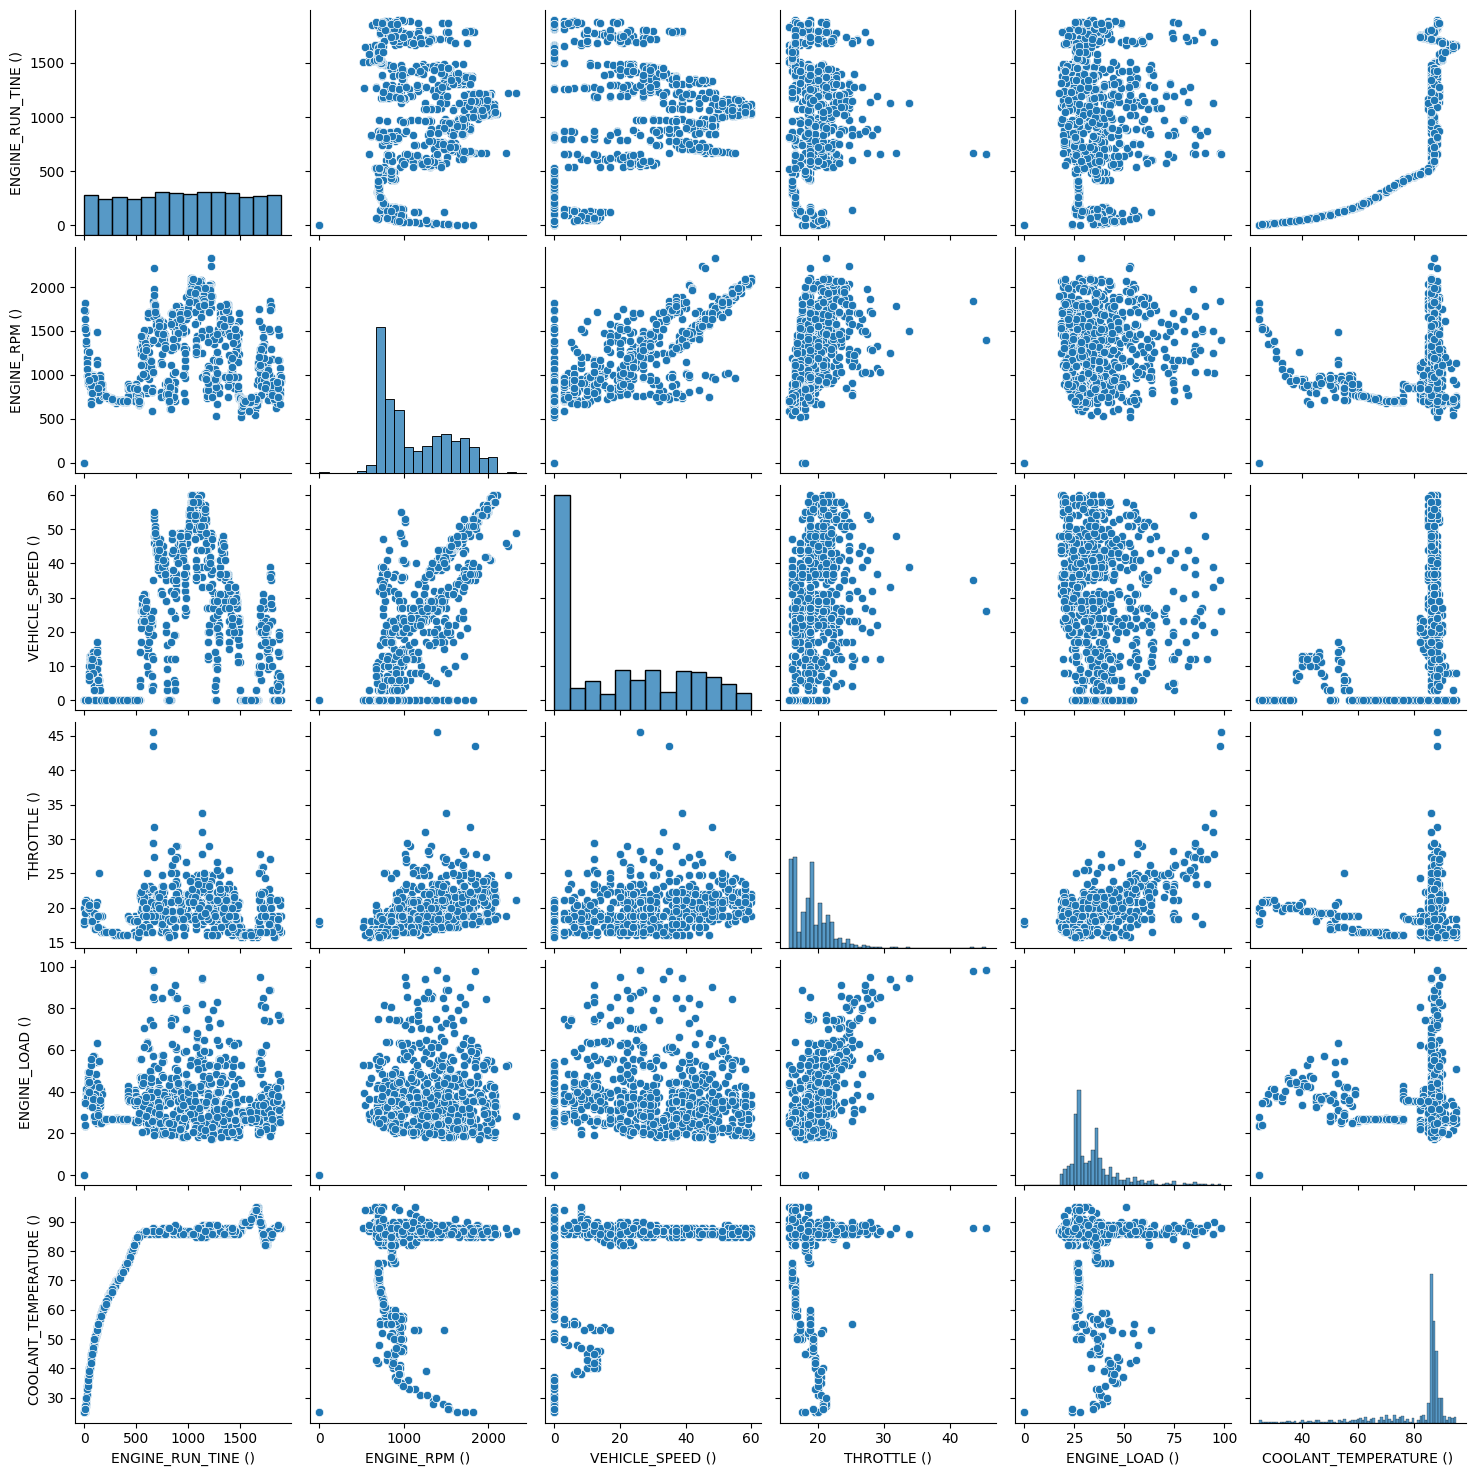

In [ ]:
column_names = ['ENGINE_RUN_TINE ()','ENGINE_RPM ()', 'VEHICLE_SPEED ()', 'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()']
dataf1 = pd.DataFrame(X_train, columns=column_names)
dataf1.head()

sns.pairplot(dataf1)

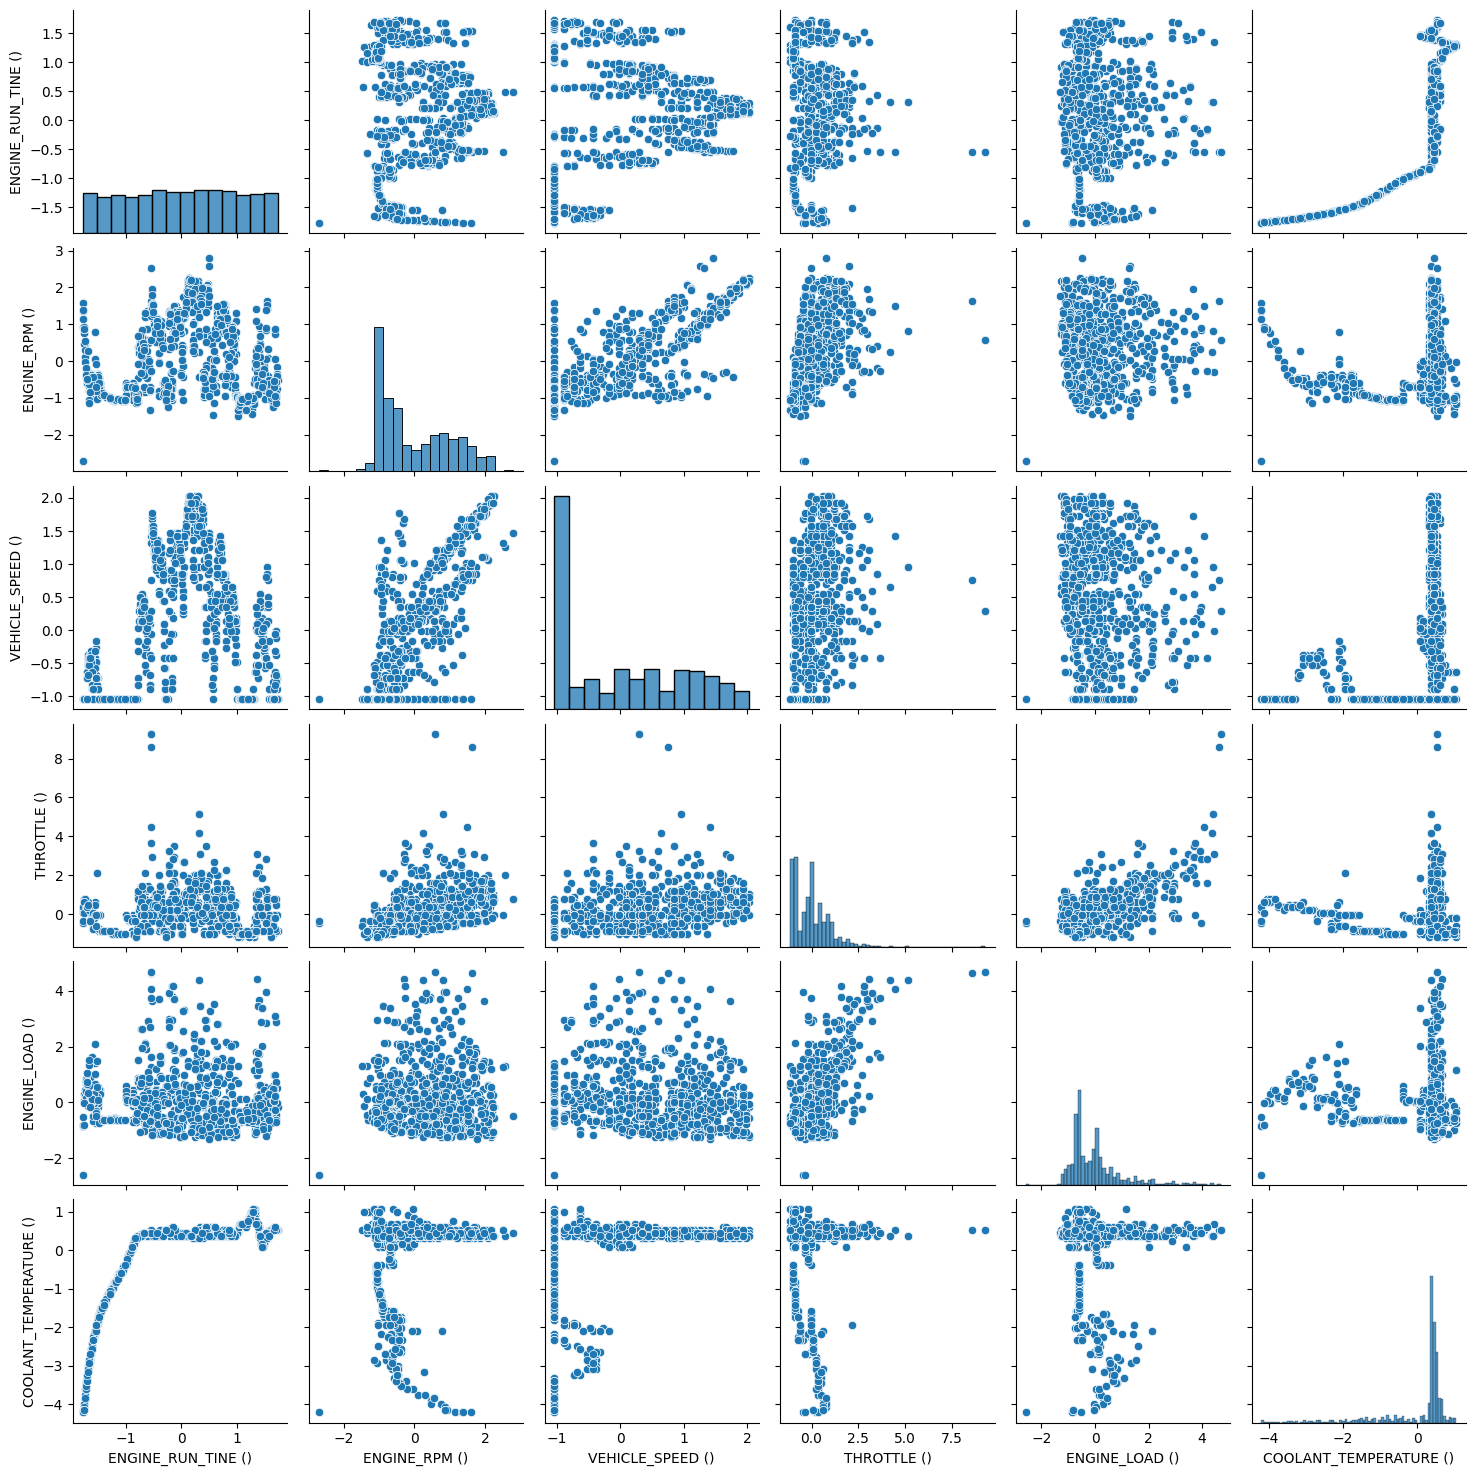

In [ ]:
column_names1 = ['ENGINE_RUN_TINE ()','ENGINE_RPM ()', 'VEHICLE_SPEED ()', 'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()']
dataf2 = pd.DataFrame(X_train_standardsc, columns=column_names1)
dataf2.head()

sns.pairplot(dataf2)

# Machine Learning Model Training

# K-Nearest Neighbor (KNN)
Here, we are training the model in order to check the accuracy score of the data. K-Nearest Neighbors (KNN) is a simple and popular machine learning algorithm used for both classification and regression tasks. It memorizes the entire training dataset, and when given a new input, it searches for the k-nearest data points (neighbors) in the training set and makes predictions based on the majority class among those neighbors.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [ ]:
model.fit(X_train_standardsc, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
Predict = model.predict(X_test_standardsc)
Predict

array([3, 2, 2, ..., 0, 0, 1])

# **Accuaracy Score**

In [ ]:
accuracy_score(y_test, Predict)

0.76239907727797

In [ ]:
# Performing prediction using KNN-Algorithm.

url = ('https://obdapi.vercel.app/api/getFormValues')

res = requests.get(url)
prediction_data= []

if res.status_code == 200:
    data = res.json()
    data = res.json()["data"][0]
    engineRunTime = int(data['engineRunTime'])
    engineRpm = int(data['engineRpm'])
    vehicleSpeed = int(data['vehicleSpeed'])
    throttle = int(data['throttle'])
    engineLoad = int(data['engineLoad'])
    coolantTemp = int(data['coolantTemp'])
    prediction_data = [[engineRunTime, engineRpm, vehicleSpeed, throttle, engineLoad, coolantTemp]]

print("prediction_data",prediction_data)

Prediction = model.predict(prediction_data)

import json

varr = {"accuracy":(accuracy_score(y_test, Predict))*100, "predict":int(Prediction[0])}

convertToJson = json.dumps(varr)
# varr = [
#      {
#       "accuracy":(accuracy_score(y_test, Predict))*100,
#       "predict":Prediction[0]
#      }
#     ]

url = ('https://obdapi.vercel.app/api/postModelData')
print(url)
# response = requests.get(url);
response = requests.post(url,json={'values':convertToJson});
print(f"Request returned {response.status_code} : '{response.reason}'")
print(response.json())
payload = response.json()
print(payload)
Prediction[0]

IndexError: list index out of range